# Police Shootings in USA

To create this analysis, only the information contained in the original dataset was analyzed. The proportion of the population of ethnic groups in North American territory, such an analysis would probably reveal a more xenophobic and racist face of the U.S police forces. <br><br><b>#BlackLivesMatter</b>

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
file= 'input/fatal-police-shootings-data.csv'
df= pd.read_csv(file)
df.sample(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2234,2486,Glenn Watenpool,2017-04-06,shot,gun,68.0,M,W,Bradenton,FL,False,attack,Not fleeing,False
4056,4457,Ty'rell Pounds,2019-02-11,shot,gun,24.0,M,B,Crestwood,KY,False,attack,Car,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

## Gender Analysis

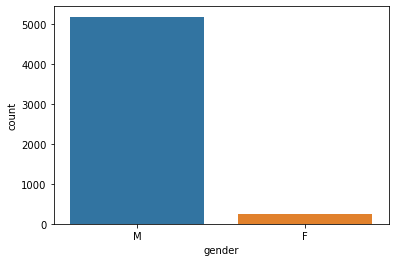

In [5]:
ax= sns.countplot(x=df['gender'], data= df)

In [6]:
gender_EDA= (df['gender'].value_counts(normalize= True)*100).round(2)
print(f'{gender_EDA.M}% of deaths caused by  U.S police are men.')

95.6% of deaths caused by  U.S police are men.


## Age analysis

In [8]:
age= df['age'].value_counts().to_frame().T
age.index= ['Total']
age

,31.0,25.0,33.0,27.0,29.0,32.0,34.0,36.0,24.0,28.0,...,82.0,86.0,80.0,6.0,91.0,89.0,12.0,78.0,13.0,79.0
Total,186,183,171,171,169,168,167,157,157,156,...,2,2,2,2,1,1,1,1,1,1


In [9]:
age_slice= [0,10,20,30,40,50,60,70,80,90,100] #USAR UMA FUNÇÂO PRA GERAR 
labels= ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
age_EDA= (pd.cut(x=df['age'], bins= age_slice,labels=labels, include_lowest=True)).value_counts(sort= False)
age_EDA

0-10         2
10-20      369
20-30     1487
30-40     1517
40-50      933
50-60      579
60-70      227
70-80       51
80-90       15
90-100       1
Name: age, dtype: int64

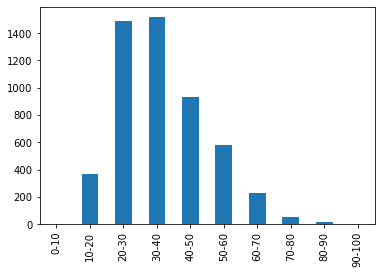

In [10]:
ax= age_EDA.plot.bar(figsize= (6,4))